# Annual Salary Prediction

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Import Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset

In [29]:
df = pd.read_csv("adult.csv")
df[df == '?'] = np.nan
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [30]:
X = df.drop(['income'], axis=1)
y = df['income']

X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


## Examine Class

In [31]:
print('<=50: ', round(df['income'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('>50: ', round(df['income'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print(df['income'].value_counts())

<=50:  75.92 % of the dataset
>50:  24.08 % of the dataset
<=50K    24720
>50K      7841
Name: income, dtype: int64


In [32]:
# Next step:
# Remove Outliers
# Balance dataset (under/oversampling)

## Handle Missing Data

In [33]:
# Check for features with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
# No numerical data has null objects
# 3 categorical data has null objects
# Impute missing categorical data with the mode

for col in ['workclass', 'occupation', 'native.country']:
    X[col].fillna(X[col].mode()[0], inplace=True)

X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


## Encode Categorical Data

### Encoding Independent Variables

In [35]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X)

### Encoding Dependent Variables

In [36]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
# Turn independent varible into numpy array
X = X.values

# Examine shape after encoding
print(X.shape)
print(y.shape)

(32561, 105)
(32561,)


## Split Training Set and Test Set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(26048, 105) (6513, 105)
(26048,) (6513,)


In [40]:
print(X_train)

[[    26 256263      9 ...      1      0      0]
 [    24 170277      9 ...      1      0      0]
 [    36  75826     13 ...      1      0      0]
 ...
 [    55 238192      9 ...      1      0      0]
 [    41 154076     10 ...      1      0      0]
 [    22 162667      9 ...      0      0      0]]


## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training Classifier Model on the Training Set

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## Evaluating the Prediction

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
mcc =matthews_corrcoef(y_test,y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews correlation coefficient: {mcc}")

Accuracy: 0.8473821587594043
Precision: 0.7132757266300078
Recall: 0.5907612231620039
F1-Score: 0.6462633451957295
Matthews correlation coefficient: 0.5540275543530467


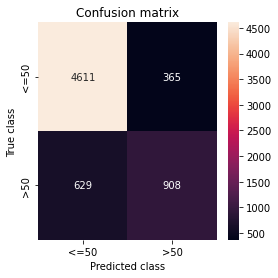

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
LABELS = ['<=50', '>50']
confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mtx, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()